In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data  Understanding

Data : Ted talk (https://www.kaggle.com/rounakbanik/ted-talks)

comments : The number of first level comments made on the talk

description :  A blurb of what the talk is about

event : The TED/TEDx event where the talk took place

film_date : The Unix timestamp of the filming

languages : The number of languages in which the talk is available

main_speaker : The first named speaker of the talk

name : The official name of the TED Talk. Includes the title and the speaker.

num_speaker : The number of speakers in the talk

published_date : The Unix timestamp for the publication of the talk on TED.com

ratings : A stringified dictionary of the various ratings given to the talk 
inspiring, fascinating, jaw dropping, etc.)

related_talks : A list of dictionaries of recommended talks to watch next

speaker_occupation :  The occupation of the main speaker

tags : The themes associated with the talk

title : The title of the talk

url :The URL of the talk

views : The number of views on the talk

In [ ]:
#Download Data from csv file 
filename='/content/sample_data/ted_talk_python.csv'
dfraw = pd.read_csv(filename)
dfraw= pd.DataFrame(dfraw)

#Understand Data checking on structure data, missing value,type of data and shape
print(dfraw.head())
print(dfraw.info())
print(dfraw.columns)
print(dfraw.shape)    

      views  ...                                        description
0   1106561  ...  Jimmy Wales recalls how he assembled "a ragtag...
1   1096862  ...  Legendary scientist David Deutsch puts theoret...
2   2885999  ...  Biologist Richard Dawkins makes a case for "th...
3  10000702  ...  Psychologist Barry Schwartz takes aim at a cen...
4   3277740  ...  Cambridge researcher Aubrey de Grey argues tha...

[5 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   views               431 non-null    int64 
 1   comments            431 non-null    int64 
 2   duration            431 non-null    int64 
 3   num_speaker         431 non-null    int64 
 4   languages           431 non-null    int64 
 5   event               431 non-null    object
 6   main_speaker        431 non-null    object
 7   name                431 non

# Data Preparation

In [ ]:
# create dummy of event
dummies = pd.get_dummies(dfraw['event'])
dummies

,TEDGlobal 2005,TEDGlobal 2007,TEDGlobal 2009,TEDGlobal 2010,TEDGlobal 2011,TEDGlobal 2012,TEDGlobal 2013,TEDGlobal 2014,TEDGlobal 2017
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
426,0,0,0,0,0,0,0,1,0
427,0,0,0,0,0,0,0,1,0
428,0,0,0,0,0,0,0,0,1
429,0,0,0,0,0,0,0,0,1


In [ ]:
#Concatnate  data with dummy of event
li=[dfraw,dummies]
df = pd.concat(li, axis=1)
df
print(df.columns)

Index(['views', 'comments', 'duration', 'num_speaker', 'languages', 'event',
       'main_speaker', 'name', 'speaker_occupation', 'title', 'description',
       'TEDGlobal 2005', 'TEDGlobal 2007', 'TEDGlobal 2009', 'TEDGlobal 2010',
       'TEDGlobal 2011', 'TEDGlobal 2012', 'TEDGlobal 2013', 'TEDGlobal 2014',
       'TEDGlobal 2017'],
      dtype='object')


In [ ]:
#Seperate data for traning ,testing and deployment
data=df.iloc[0:400,:]
Deploy_data=df.iloc[400:431,:]
print(data)

        views  comments  ...  TEDGlobal 2014  TEDGlobal 2017
0     1106561        84  ...               0               0
1     1096862       184  ...               0               0
2     2885999       507  ...               0               0
3    10000702       991  ...               0               0
4     3277740       612  ...               0               0
..        ...       ...  ...             ...             ...
395    755399        42  ...               1               0
396    695961       113  ...               1               0
397   1824724       386  ...               1               0
398   1307615        65  ...               1               0
399   1278162        35  ...               1               0

[400 rows x 20 columns]


In [ ]:
#Seperate data to x and y  by y is views (The number of views on the talk).
x = data.loc[:,[ 'comments', 'duration', 'num_speaker', 'languages',
       'TEDGlobal 2005', 'TEDGlobal 2007', 'TEDGlobal 2009', 'TEDGlobal 2010',
       'TEDGlobal 2011', 'TEDGlobal 2012', 'TEDGlobal 2013', 'TEDGlobal 2014',
       'TEDGlobal 2017']]
y=data.loc[:,'views']
print(x.head(5))
print(y.head(5))

   comments  duration  ...  TEDGlobal 2014  TEDGlobal 2017
0        84      1201  ...               0               0
1       184      1140  ...               0               0
2       507      1316  ...               0               0
3       991      1177  ...               0               0
4       612      1365  ...               0               0

[5 rows x 13 columns]
0     1106561
1     1096862
2     2885999
3    10000702
4     3277740
Name: views, dtype: int64


In [ ]:
#Seperate x,y by train_test_split  from sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(x_train.head())
print(y_train.head())
print(x_test.head())
print(y_test.head())
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

     comments  duration  ...  TEDGlobal 2014  TEDGlobal 2017
3         991      1177  ...               0               0
18         97      1070  ...               0               0
202       144       783  ...               0               0
250       138       730  ...               0               0
274       165       866  ...               0               0

[5 rows x 13 columns]
3      10000702
18       648234
202      484266
250      509747
274     2246203
Name: views, dtype: int64
     comments  duration  ...  TEDGlobal 2014  TEDGlobal 2017
209       316       658  ...               0               0
280        87       356  ...               0               0
33         43       326  ...               0               0
210        42      1176  ...               0               0
93        233       285  ...               0               0

[5 rows x 13 columns]
209     975365
280    1024326
33      200726
210     502832
93      629018
Name: views, dtype: int64
(320, 13)
(320,

In [ ]:
#Concate  x_train, x_test, y_train, y_test  for train and test dataset
train =pd.concat([x_train,y_train],axis=1).reset_index()
test =pd.concat([x_test,y_test],axis=1).reset_index()
print(train)
print(train.shape)


     index  comments  duration  ...  TEDGlobal 2014  TEDGlobal 2017     views
0        3       991      1177  ...               0               0  10000702
1       18        97      1070  ...               0               0    648234
2      202       144       783  ...               0               0    484266
3      250       138       730  ...               0               0    509747
4      274       165       866  ...               0               0   2246203
..     ...       ...       ...  ...             ...             ...       ...
315     71        91      1170  ...               0               0    891314
316    106       199      1000  ...               0               0    807653
317    270       455       865  ...               0               0   1362071
318    348       194       721  ...               0               0   1245695
319    102        75       220  ...               0               0    480142

[320 rows x 15 columns]
(320, 15)


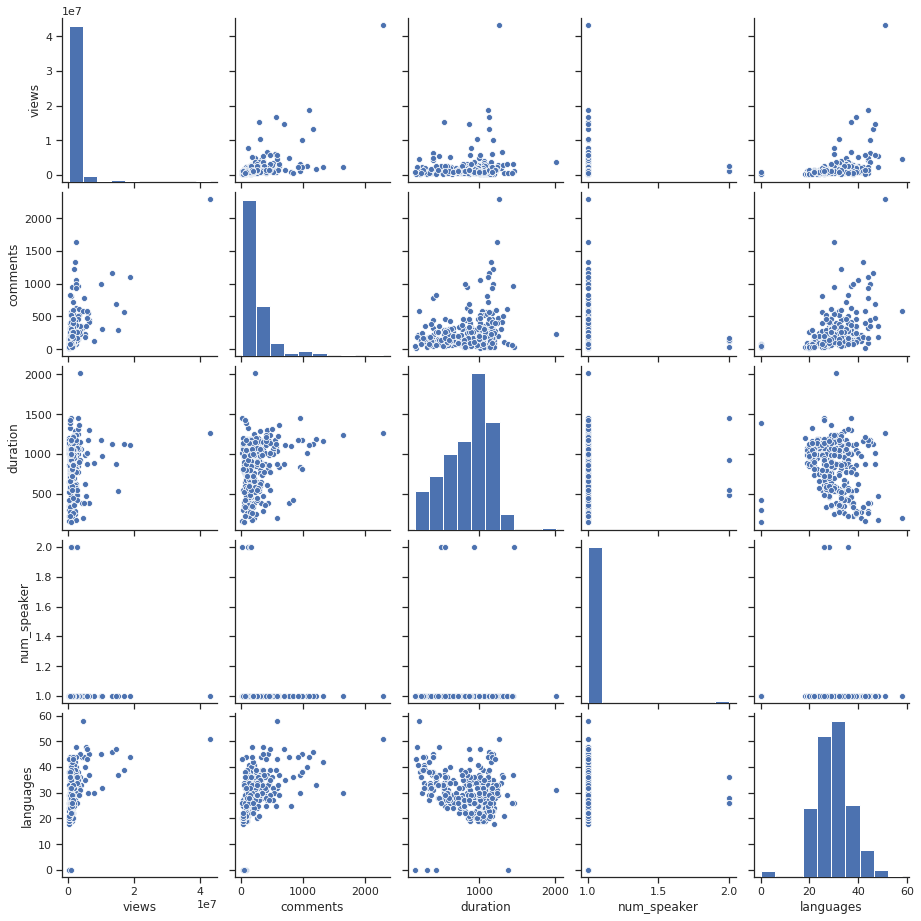

In [ ]:
# Plot trainning dataset
sns.set(style="ticks",color_codes=True)
sns.pairplot(train,vars=['views', 'comments', 'duration', 'num_speaker', 'languages'] )
#observe one point that is outlier but  that point relate on comment. So, keep it on graph for analyzing.

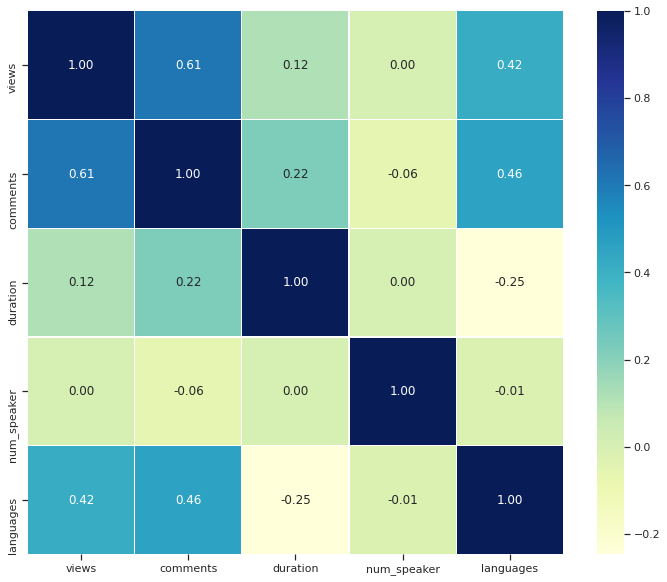

In [ ]:
#plot correlation
from scipy.stats import norm 
cols=['views', 'comments', 'duration', 'num_speaker', 'languages']
cm = np.corrcoef(train[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols,  
                              xticklabels = cols, annot=True, fmt=".2f") 
# No high correlation  on x parameter that are 'comments', 'duration', 'num_speaker', 'languages'.

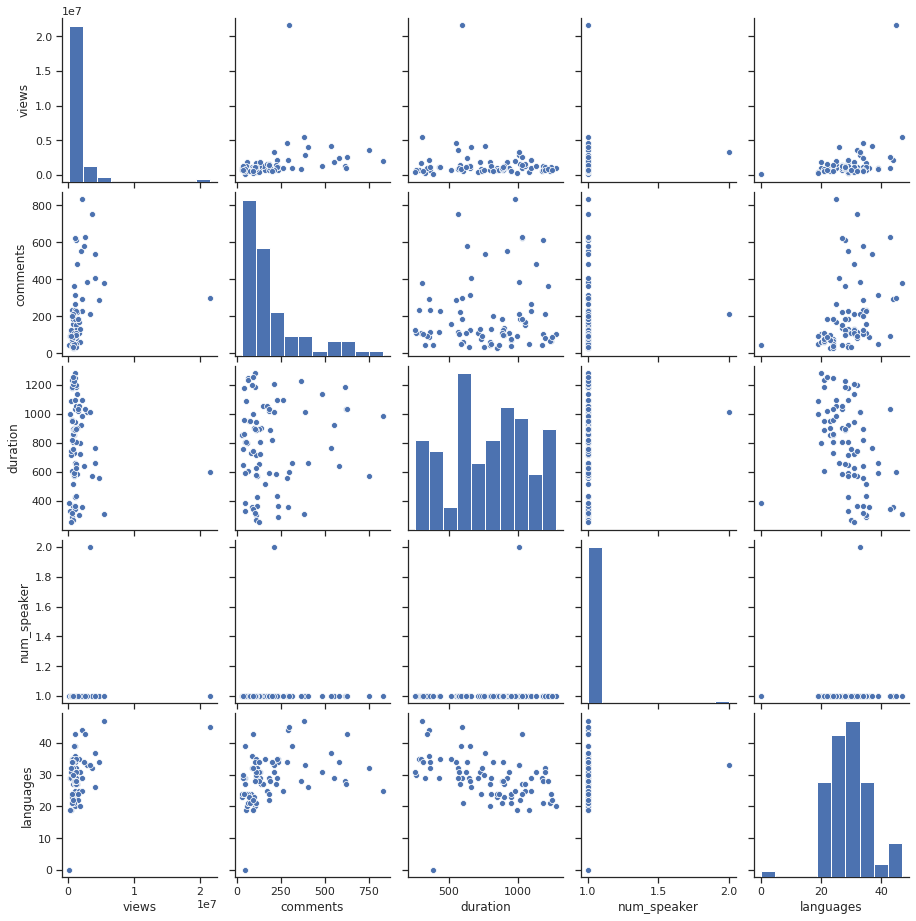

In [ ]:
#Plot test data
sns.pairplot(test,vars=['views', 'comments', 'duration', 'num_speaker', 'languages'] )

views    54
dtype: int64
    index  comments  duration  ...  TEDGlobal 2014  TEDGlobal 2017     views
54    374       297       598  ...               0               0  21594632

[1 rows x 15 columns]


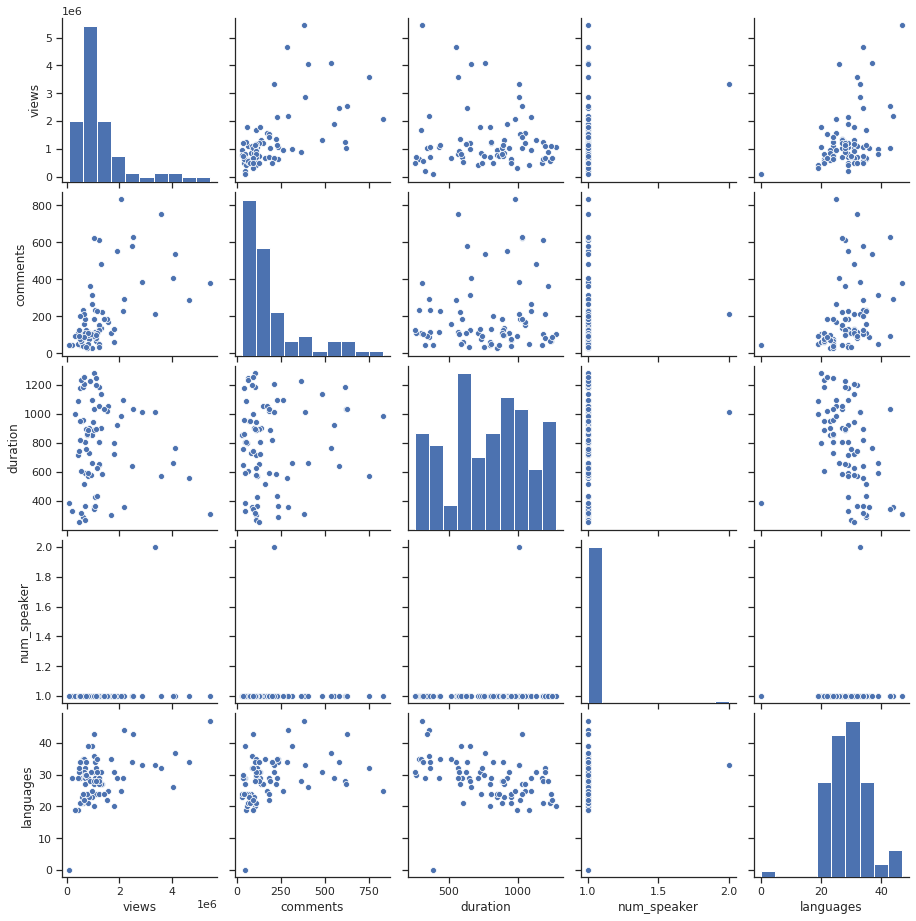

In [ ]:
##observe one point that is outlier. So,delete it.

outlier=test[['views']].idxmax()
print(outlier)
print(test.iloc[outlier,:])
x_test=x_test.drop(x_test.index[outlier])
y_test=y_test.drop(y_test.index[outlier])
test=test.drop(test.index[outlier])

sns.pairplot(test,vars=['views', 'comments', 'duration', 'num_speaker', 'languages'] )

# Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn import metrics


**Model**


*    **Linear Regression**: LinearRegression fits a linear model with coefficients w = (w1, ..., wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. 
*   **KNeighborsRegressor** : Regression based on k-nearest neighbors.The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.
*   **RandomForestRegressor** : A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
*   **DecisionTreeRegressor** : A  decision tree regressor
*   **LinearSVR** : Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.


In [ ]:
algo = [[LinearRegression(), 'LinearRegression'],
                        [KNeighborsRegressor(), 'KNeighborsRegressor'],
                        [RandomForestRegressor(), 'RandomForestRegressor'],
                        [DecisionTreeRegressor(), 'DecisionTreeRegressor'],
                        [LinearSVR(), 'LinearSVR']]
                        

# Evaluation

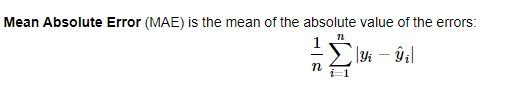

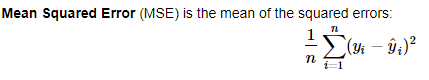

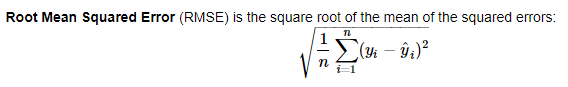



In [ ]:
li=[]
mol=[]
for a in algo:
    
    model = a[0]
    model.fit(x_train,y_train)
    predicted=model.predict(x_test)
    MAE_1=metrics.mean_absolute_error(y_test,predicted)
    MSE_1=metrics.mean_squared_error(y_test,predicted)
    RMSE_1 =np.sqrt(metrics.mean_squared_error(y_test,predicted))
    gh=[[MAE_1,MSE_1,RMSE_1]]
    Eval=pd.DataFrame(gh,columns=["MAE","MSE","RMSE"])
    Eval['model']=a[1]
    mol.append(Eval)
    yy=pd.DataFrame(zip(y_test, predicted),columns=[ "y_test", " predicted"])
    yy['model']=a[1]

    li.append(yy)

frame = pd.concat(li, axis=0, ignore_index=True)
frame['residual']=frame["y_test"].values-frame[" predicted"]
frame.to_csv("frame.csv")
eval_mol = pd.concat(mol, axis=0, ignore_index=True)

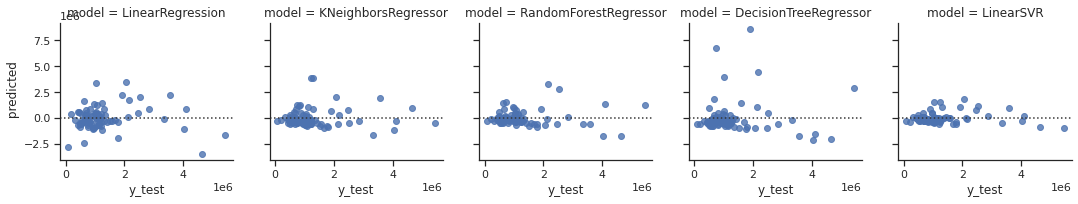

In [ ]:
#residual plot
pp = sns.FacetGrid(frame, col="model")
pp.map(sns.residplot, "y_test", " predicted");

Obsever pattern of residual plot  is  non-linear. So,tranforming y=log(y)

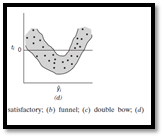

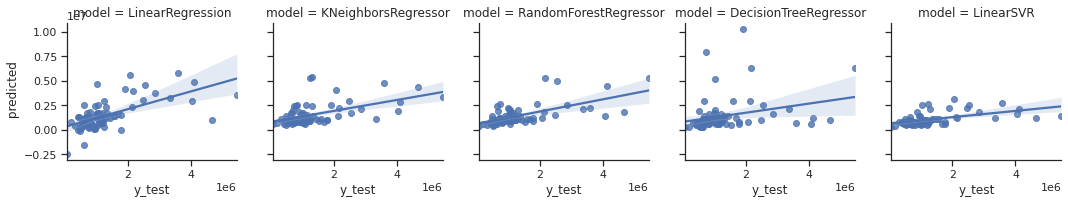

In [ ]:
#Plot between  y_test and y_predict
g = sns.FacetGrid(frame, col="model")
g.map(sns.regplot, "y_test", " predicted");

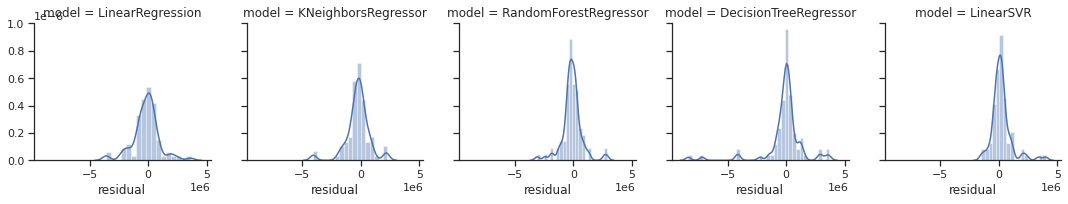

In [ ]:
#Plot normal distribution of residual
q = sns.FacetGrid(frame, col="model")
q.map(sns.distplot, "residual");

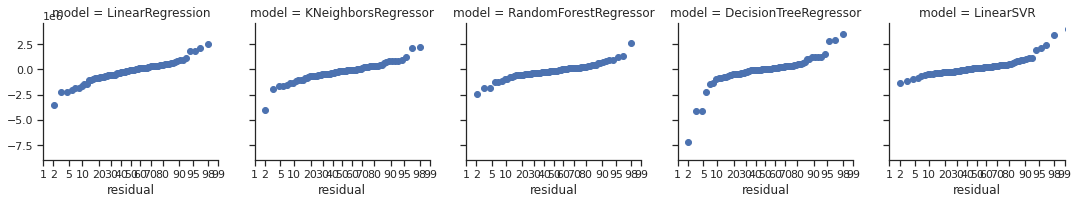

In [ ]:
#Plot quantile normal distributionof residual
!pip install probscale
import probscale
fg = sns.FacetGrid(frame, col="model")
fg.map(probscale.probplot, 'residual');

In [ ]:
#Tranforming y=log(y)
import math
def map_log(x):
  return math.log(x)

y_train_log= map(map_log,y_train)
y_train_log= list(y_train_log)
y_test_log= map(map_log,y_test)
y_test_log= list(y_test_log)
print(y_test)
print(y_test_log)

209     975365
280    1024326
33      200726
210     502832
93      629018
        ...   
246    3346345
227     487006
369    1424893
176     498409
289     725173
Name: views, Length: 79, dtype: int64
[13.790567038899505, 13.839545393290997, 12.209696072980941, 13.128011397268924, 13.351915152125269, 13.829694488730631, 14.462425300582517, 13.885442321887082, 13.660184521008699, 14.028051701869602, 13.867873380202955, 15.227107833207542, 13.370350944481018, 14.571603429280742, 15.351556580258258, 13.90857549181655, 13.449691072722471, 14.009198933667514, 13.415398596167359, 13.76672464378581, 14.586501723084389, 13.543609966932012, 14.335819274731955, 13.632586019413354, 13.91676756573816, 13.453048903263808, 13.467703322279185, 13.85740941246264, 14.120169946747932, 12.974575412506548, 13.535001365457658, 15.510618882029041, 13.878796106959998, 15.088971551087287, 13.233052868815202, 14.392234028565898, 13.616649779169906, 14.081832365632224, 13.768470311794845, 14.082889918098202, 

In [ ]:
# Fit model with tranformation y 
li=[]
mol=[]
for a in algo:
    model = a[0]
    model.fit(x_train,y_train_log)
    predicted=model.predict(x_test)
    MAE_1=metrics.mean_absolute_error(y_test_log,predicted)
    MSE_1=metrics.mean_squared_error(y_test_log,predicted)
    RMSE_1 =np.sqrt(metrics.mean_squared_error(y_test_log,predicted))
    gh=[[MAE_1,MSE_1,RMSE_1]]
    Eval=pd.DataFrame(gh,columns=["MAE","MSE","RMSE"])
    Eval['model']=a[1]
    mol.append(Eval)
    yy=pd.DataFrame(zip(y_test_log, predicted),columns=[ "y_test", " predicted"])
    yy['model']=a[1]
    li.append(yy)
frame1 = pd.concat(li, axis=0, ignore_index=True)
frame1['residual']=frame1["y_test"].values-frame1[" predicted"]
eval_mol = pd.concat(mol, axis=0, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


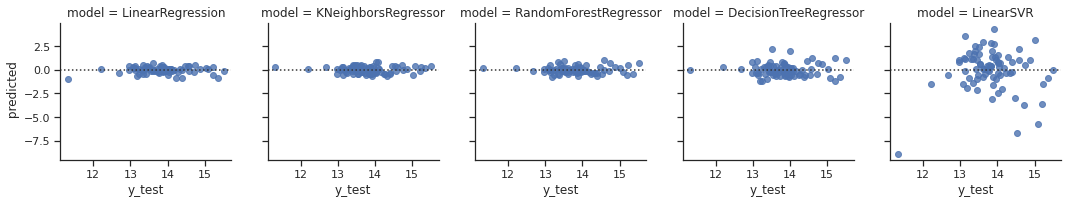

In [ ]:
#residual plot
pp = sns.FacetGrid(frame1, col="model")
pp.map(sns.residplot, "y_test", " predicted");

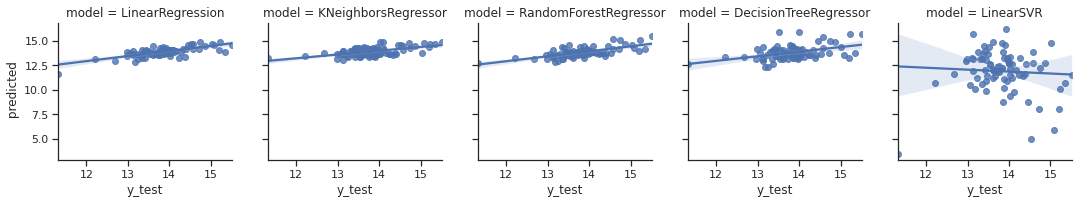

In [ ]:
#Plot between  y_test and y_predict
g = sns.FacetGrid(frame1, col="model")
g.map(sns.regplot, "y_test", " predicted");

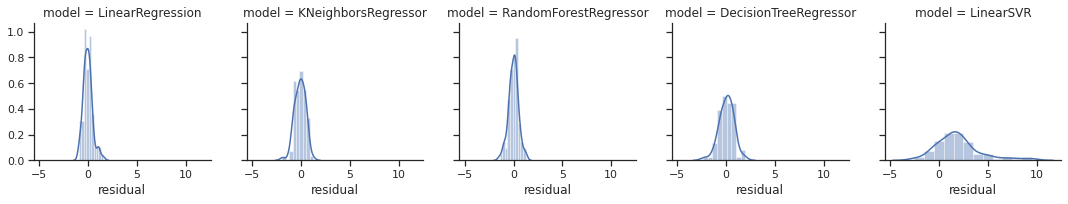

In [ ]:
#Plot normal distribution of residual
q = sns.FacetGrid(frame1, col="model")
q.map(sns.distplot, "residual");

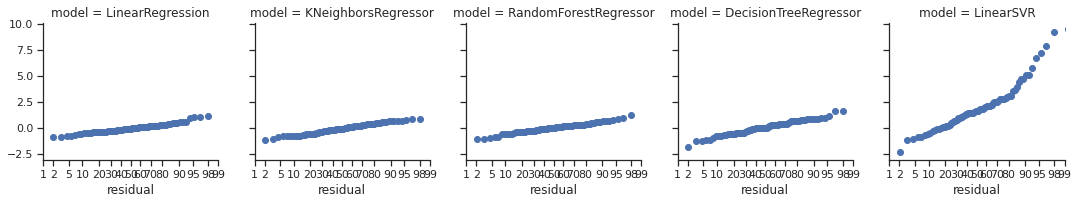

In [ ]:
#Plot quantile normal distributionof residual
# !pip install probscale
import probscale
fg = sns.FacetGrid(frame1, col="model")
fg.map(probscale.probplot, 'residual');

In [ ]:
print(eval_mol)

        MAE       MSE      RMSE                  model
0  0.356357  0.217063  0.465900       LinearRegression
1  0.445461  0.306937  0.554019    KNeighborsRegressor
2  0.384881  0.246462  0.496449  RandomForestRegressor
3  0.583817  0.564780  0.751518  DecisionTreeRegressor
4  2.229599  9.015950  3.002657              LinearSVR


In [ ]:
#Select the lowest RMSE's model
MAE_min=eval_mol[['MAE']].idxmin()
MSE_min=eval_mol[['MSE']].idxmin()
RMSE_min=eval_mol[['RMSE']].idxmin()
print(MAE_min,MSE_min,RMSE_min)
final_model=eval_mol.iloc[RMSE_min,3]
final_model=list(final_model)
# print(final_model)


MAE    0
dtype: int64 MSE    0
dtype: int64 RMSE    0
dtype: int64


In [ ]:
#select deploy data and tranform y
Deploy_data=df.iloc[400:431,:]
predict_x = Deploy_data.loc[:,[ 'comments', 'duration', 'num_speaker', 'languages',
       'TEDGlobal 2005', 'TEDGlobal 2007', 'TEDGlobal 2009', 'TEDGlobal 2010',
       'TEDGlobal 2011', 'TEDGlobal 2012', 'TEDGlobal 2013', 'TEDGlobal 2014',
       'TEDGlobal 2017']]
predict_y=Deploy_data.loc[:,'views']
predict_y=map(map_log,predict_y)
predict_y=list(predict_y)
print(predict_x.head())
print(predict_y)

     comments  duration  ...  TEDGlobal 2014  TEDGlobal 2017
400        43       322  ...               1               0
401        31       345  ...               1               0
402        22       916  ...               1               0
403        70       985  ...               1               0
404        32       962  ...               1               0

[5 rows x 13 columns]
[13.781586592244297, 14.0518774936847, 13.685051013806984, 14.286528672445804, 13.787950237427204, 13.7168221784634, 14.413609974285919, 13.791853933552785, 14.08127442185511, 13.531823162821, 14.120725772613305, 13.929458694229053, 14.724669519110135, 14.775029347465944, 13.61529709129044, 13.90736112383603, 13.955130751163058, 13.516143143731293, 14.267551316523322, 13.942479716149375, 13.770118762792116, 14.023498237074039, 14.109992707396259, 15.369012838068072, 14.108063000883732, 14.05624645255837, 14.577216915979509, 13.996619713430004, 13.46989989280799, 13.203183628866178, 12.944116706972402]


# Deployment

In [ ]:
#Fit deploy data with  model that have lowest MSE.
li=[]
mol=[]

for a in algo:
  kl=str(a[1])
  # print(kl)
  # print(str(final_model))
  for index, row in eval_mol.iterrows():
    if kl == row['model'] and kl== final_model[0] :
        print(row['model'])
        model = a[0]
        print(model)
        model.fit(x_train,y_train_log)
        print('Intercept :' ,model.intercept_)
        print('Coefient : ',model.coef_)
        print('x : ', x_train.columns)
        predicted=model.predict(predict_x)
        MAE_1=metrics.mean_absolute_error(predict_y,predicted)
        # print(MAE_1)
        MSE_1=metrics.mean_squared_error(predict_y,predicted)
        RMSE_1 =np.sqrt(metrics.mean_squared_error(predict_y,predicted))
        gh=[[MAE_1,MSE_1,RMSE_1]]
        Eval=pd.DataFrame(gh,columns=["MAE","MSE","RMSE"])
        Eval['model']=a[1]
        # print(Eval)
        mol.append(Eval)
        yy=pd.DataFrame(zip(y_test_log, predicted),columns=[ "y_test", " predicted"])
        yy['model']=a[1]
        li.append(yy)
        
frame = pd.concat(li, axis=0, ignore_index=True)
frame['residual']=frame["y_test"].values-frame[" predicted"]
frame.to_csv("frame.csv")

LinearRegression
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Intercept : 11.47594920124962
Coefient :  [ 0.00096147  0.00042649  0.31782702  0.05354054  0.13323934 -0.37741811
  0.07549389 -0.31813933 -0.24851636  0.18632713  0.27262634  0.2763871
  0.        ]
x :  Index(['comments', 'duration', 'num_speaker', 'languages', 'TEDGlobal 2005',
       'TEDGlobal 2007', 'TEDGlobal 2009', 'TEDGlobal 2010', 'TEDGlobal 2011',
       'TEDGlobal 2012', 'TEDGlobal 2013', 'TEDGlobal 2014', 'TEDGlobal 2017'],
      dtype='object')


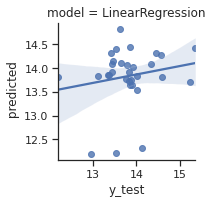

In [ ]:
#Plot between  y_test and y_predict
g = sns.FacetGrid(frame, col="model")
g.map(sns.regplot, "y_test", " predicted");

**Reference**

https://www.ritchieng.com/machine-learning-linear-regression/


https://medium.com/@dhwajraj/learning-python-regression-analysis-part-9-tests-and-validity-for-regression-models-78dcd5cde3a1

https://machinelearningmastery.com/multi-output-regression-models-with-python/


https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html


http://dataminingtrend.com/2014/data-mining-techniques/crisp-dm-example/
